##### 자료 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

titanic_df = sns.load_dataset('titanic')
titanic_df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


##### 결측치 제거

In [3]:
titanic_df['age'].fillna(titanic_df['age'].mean(), inplace = True)
titanic_df['embarked'].fillna('N', inplace=True)
titanic_df['embark_town'].fillna('N', inplace=True)
titanic_df['deck'] = titanic_df['deck'].astype('object')
titanic_df['deck'].fillna('N', inplace=True)

In [4]:
titanic_df['class'] = titanic_df['class'].astype('object')
titanic_df.isnull().sum().sum()

0

sex
male      577
female    314
Name: count, dtype: int64
________________________
embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64
________________________
who
man      537
woman    271
child     83
Name: count, dtype: int64
________________________
embark_town
Southampton    644
Cherbourg      168
Queenstown      77
N                2
Name: count, dtype: int64
________________________
alive
no     549
yes    342
Name: count, dtype: int64
________________________


<Axes: xlabel='class', ylabel='survived'>

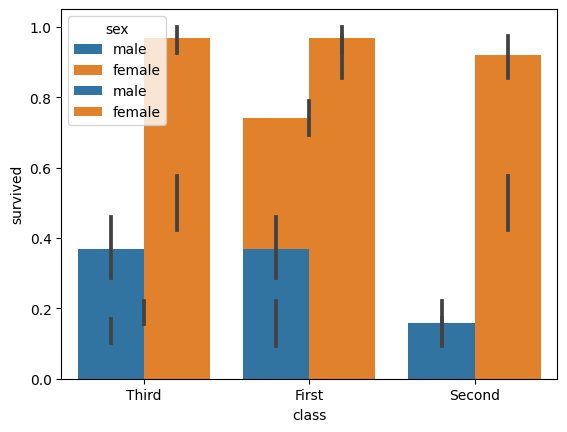

In [5]:
col_list = ['sex', 'embarked', 'who', 'embark_town', 'alive']
for col in col_list:
    print(titanic_df[col].value_counts())
    print('________________________')

sns.barplot(x='sex', y='survived', data=titanic_df)
sns.barplot(x='pclass', y='survived', hue='sex', data=titanic_df)
sns.barplot(x='class', y='survived', hue='sex', data=titanic_df)

In [6]:
def get_category(age):
    cat = ''
    if age <= -1:
        cat = 'unknown'
    elif age <= 5:
        cat = 'baby'
    elif age <= 12:
        cat = 'child'
    elif age <= 18:
        cat = 'teenage'
    elif age <= 25:
        cat = 'student'
    elif age <= 35:
        cat = 'young adult'
    elif age <= 60:
        cat = 'adult'
    else:
        cat = 'elderly'

    return cat

<Axes: xlabel='age_cat', ylabel='survived'>

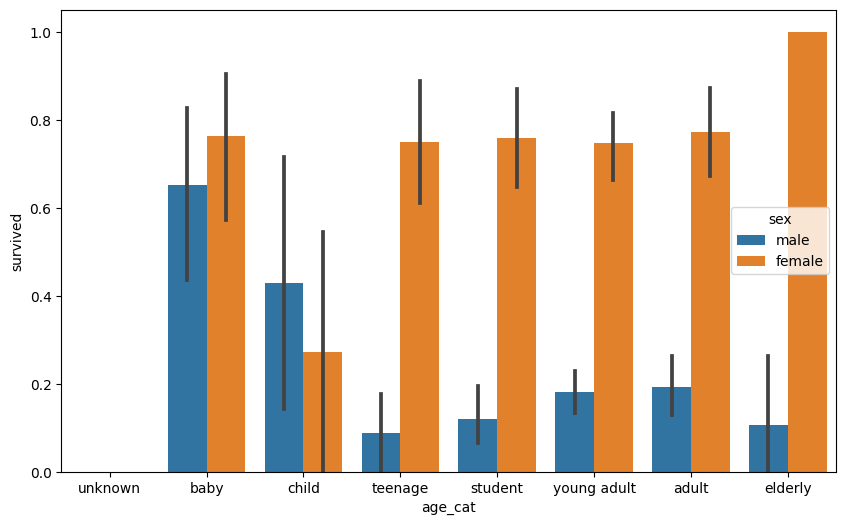

In [7]:
plt.figure(figsize=(10,6))
group_names = ['unknown', 'baby', 'child', 'teenage', 'student', 'young adult', 'adult', 'elderly']
titanic_df['age_cat'] = titanic_df['age'].apply(lambda x: get_category(x))
sns.barplot(x = 'age_cat', y = 'survived', hue = 'sex', data = titanic_df, order = group_names)

##### 라벨인코더

In [8]:

from sklearn.preprocessing import LabelEncoder

In [9]:
def encode_features(data_df):
    features = ['sex', 'embarked', 'deck', 'embark_town',  'alive', 'alone']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(data_df[feature])
        data_df[feature] = le.transform(data_df[feature])
    return data_df

titanic_df = encode_features(titanic_df)
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_cat
0,0,3,1,22.0,1,0,7.2500,3,Third,man,True,7,3,0,0,student
1,1,1,0,38.0,1,0,71.2833,0,First,woman,False,2,0,1,0,adult
2,1,3,0,26.0,0,0,7.9250,3,Third,woman,False,7,3,1,1,young adult
3,1,1,0,35.0,1,0,53.1000,3,First,woman,False,2,3,1,0,young adult
4,0,3,1,35.0,0,0,8.0500,3,Third,man,True,7,3,0,1,young adult


##### 정리

In [10]:
# null 처리 함수
def fillna(data_df):
    data_df['age'].fillna(data_df['age'].mean(), inplace=True)
    data_df['deck'] = data_df['deck'].astype('object')
    data_df['deck'].fillna('N', inplace=True)
    data_df['embarked'].fillna('N', inplace=True)
    data_df['fare'].fillna(0, inplace=True)
    return data_df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(data_df):
    data_df.drop(['who', 'adult_male', 'embark_town', 'alive', 'alone'], axis=1, inplace=True)
    return data_df

# 레이블 인코딩 수행
def format_features(data_df):
    features = ['sex', 'embarked', 'deck', 'class']
    from sklearn.preprocessing import LabelEncoder
    encoder = LabelEncoder()
    for feature in features:
        encoder = encoder.fit(data_df[feature])
        data_df[feature] = encoder.transform(data_df[feature])
    return data_df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(data_df):
    data_df = fillna(data_df)
    data_df = drop_features(data_df)
    data_df = format_features(data_df)
    return data_df

# 함수 호출
titanic_df = sns.load_dataset('titanic')
titanic_df.head(2)

target_df = titanic_df[['survived']]
titanic_df.drop(['survived'], axis=1, inplace=True)

titanic_df = transform_features(titanic_df)
titanic_df.head(2)

,pclass,sex,age,sibsp,parch,fare,embarked,class,deck
0,3,1,22.0,1,0,7.2500,3,2,7
1,1,0,38.0,1,0,71.2833,0,0,2


##### 데이터 분리

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(titanic_df, target_df, test_size=0.2, random_state=0)

##### 모델 임포트 및 성능 평가

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=0)
rf_clf = RandomForestClassifier(random_state=0)
lr_clf = LogisticRegression(solver='liblinear')

In [13]:
import warnings
warnings.filterwarnings('ignore')
models = [dt_clf, rf_clf, lr_clf]
for model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    class_name = model.__class__.__name__
    print('{0} 모델의 성능은 {1:.4f} 입니다.'.format(class_name, accuracy))

DecisionTreeClassifier 모델의 성능은 0.7821 입니다.
RandomForestClassifier 모델의 성능은 0.8492 입니다.
LogisticRegression 모델의 성능은 0.7989 입니다.
